### Optimización por Colonias de Hormigas (ACO)

La Optimización por Colonias de Hormigas (ACO) es un algoritmo metaheurístico inspirado en el comportamiento de las hormigas en la naturaleza para encontrar caminos óptimos. Las hormigas reales depositan feromonas a lo largo de los caminos que recorren, y las siguientes hormigas tienen mayor probabilidad de seguir caminos con una mayor concentración de feromonas, permitiendo que se descubran rutas eficientes a lo largo del tiempo. En ACO, modelamos este comportamiento utilizando un grafo, donde los nodos representan ubicaciones y las aristas representan caminos con pesos asociados, como distancias o costos.

En el algoritmo, la probabilidad $P_{ij}$ de que una hormiga se mueva del nodo $i$ al nodo $j$ está dada por la fórmula:

$$
P_{ij} = \frac{[\tau_{ij}]^\alpha \cdot [\eta_{ij}]^\beta}{\sum_{k \in \text{no visitados}} [\tau_{ik}]^\alpha \cdot [\eta_{ik}]^\beta}
$$

Donde:
- $ \tau_{ij} $ es la cantidad de feromonas en la arista que conecta los nodos $i$ y $j$.
- $ \eta_{ij} = \frac{1}{d_{ij}} $ es la visibilidad, que es inversamente proporcional a la distancia $ d_{ij} $ entre los nodos $i$ y $j$.
- $ \alpha $ y $ \beta $ son parámetros que controlan la importancia relativa de las feromonas y la visibilidad.

Durante cada iteración, cada hormiga construye un camino completo basado en estas probabilidades, y después se actualizan las feromonas a lo largo de los caminos recorridos. El incremento de feromonas en una arista $ (i, j) $ está dado por:

$$
\Delta \tau_{ij} = \frac{Q}{L}
$$

Donde $Q$ es una constante y $L$ es la longitud del camino recorrido por la hormiga. Posteriormente, las feromonas en todas las aristas se evaporan de acuerdo con un factor de decaimiento $ \rho $:

$$
\tau_{ij} \leftarrow (1 - \rho) \cdot \tau_{ij} + \Delta \tau_{ij}
$$

Este proceso de exploración y explotación se repite durante varias iteraciones, y la mejor solución (camino más corto) es seleccionada al final. El algoritmo garantiza que los caminos con buenas soluciones acumulen más feromonas, aumentando la probabilidad de ser seleccionados en futuras iteraciones.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from AntColony import AntColony

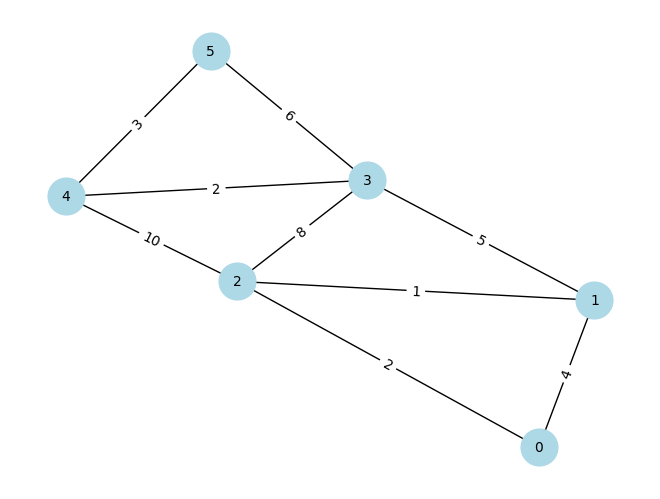

In [13]:
# Crear un grafo con networkx
G = nx.Graph()
edges = [
    (0, 1, 4), (0, 2, 2), (1, 3, 5), (1, 2, 1),
    (2, 3, 8), (2, 4, 10), (3, 4, 2), (3, 5, 6), (4, 5, 3)
]
G.add_weighted_edges_from(edges)

# Dibujar el grafo para visualizarlo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [18]:
# Inicializar el algoritmo ACO
aco = AntColony(G, n_ants=10, n_iterations=100, decay=0.95, alpha=1, beta=2)

# Ejecutar ACO para encontrar la ruta más corta entre el nodo 0 y el nodo 5
start_node = 0
end_node = 5
aco_result = aco.run(start_node, end_node)
aco_path = '->'.join(map(str, [node for node, _ in aco_result[0]]))+f'->{end_node}'
print("ACO: Ruta más corta:", aco_path)


ACO: Ruta más corta: 0->2->1->3->4->5


In [21]:
# Comparar con el algoritmo de Dijkstra de networkx
dijkstra_result = nx.dijkstra_path(G, source=start_node, target=end_node)
dijkstra_length = nx.dijkstra_path_length(G, source=start_node, target=end_node)
print("Dijkstra: Ruta más corta:", "->".join(map(str,dijkstra_result)))
print("Dijkstra: Longitud de la ruta más corta:", dijkstra_length)


Dijkstra: Ruta más corta: 0->2->1->3->4->5
Dijkstra: Longitud de la ruta más corta: 13
